# Network Processing
---

#### Run this code block by block to convert a road network(s) in ESRI Shapefile or GeoJSON format into a routable and conflated network graph to use in BikewaySim.

Note that three networks were used in this project. While code to obtain OSM GeoJSONs has been included with osm_processing notebook, the ABM and HERE networks need to be sourced from the Atlanta Regional Commission and HERE respectively. You can run most of this code with only OSM data, but you'll need to skip and/or modify some sections.

## Import/install the following packages:


In [9]:
import os
from pathlib import Path
import time
import geopandas as gpd
import pickle

## Import Network Filter Module:

In [10]:
from network_filter import *

## Set Directory:
### Modify this directory to where you stored your network shapefiles.

In [11]:
#make directory/pathing more intuitive later
file_dir = r"C:\Users\tpassmore6\Documents\BikewaySimData" #directory of bikewaysim network processing code

#change this to where you stored this folder
os.chdir(file_dir)

## Choose study area:
#### Specify what area you want to mask the spatial data by. Only network links that are partially within the study area will be imported. Note: Network links are NOT clipped, any links that are at least partially within the study area are brought in.

The area of the bikewaysim boundary is 12.4 square miles.


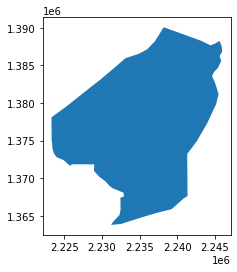

In [12]:
studyareafp = r'base_shapefiles/bikewaysim_study_area/bikewaysim_study_area.shp'
studyarea_name = 'bikewaysim'
#city_of_atlantafp = r'base_shapefiles/coa/Atlanta_City_Limits.shp'
#atlanta_regional_commissionfp = r'base_shapefiles/arc/arc_bounds.shp'

desired_crs = "EPSG:2240"

#add new study areas if desired
studyarea = import_study_area(studyareafp, studyarea_name, desired_crs)

## Network Mapper
This is how network node ID's will be identified and coded
- the first number in the node ID represents its origin network
- all numbers after that are the original network ID 

In [13]:
network_mapper = {
    "abm": "1",
    "here": "2",
    "osm": "3",
    "original": "0",
    "generated": "1"
}

## Network Data Filepaths:

In [14]:
abmfp = r'base_shapefiles/arc/ABM2020-TIP20-2020-150kShapefiles-outputs.gdb'
abmnodesfp = r'base_shapefiles/arc/ABM2020-TIP20-2020-150kShapefiles-outputs.gdb'
herefp = r'base_shapefiles/here/Streets.shp'
osmfp = r'base_shapefiles/osm/osm_network_bikewaysim.gpkg'
osmnodesfp = r'base_shapefiles/osm/osm_network_bikewaysim.gpkg'

In [15]:
#Use to list layers if needed
import fiona
fiona.listlayers('base_shapefiles/arc/ABM2020-TIP20-2020-150kShapefiles-outputs.gdb')

['DAILY_Node',
 'DAILY_Link',
 'EA_Node',
 'EA_Link',
 'AM_Node',
 'AM_Link',
 'MD_Node',
 'MD_Link',
 'PM_Node',
 'PM_Link',
 'EV_Node',
 'EV_Link']

## Set Network Import Settings
#### Create a dictionary for use in filter networks function. 
#### For new networks follow this format:
```python
network = {
       "studyarea": studyarea, #geodataframe of the study area
       "studyarea_name": studyarea_name, #name for the study area
       "networkfp": networkfp, #filepath for the network, specified earlier
       "network_name": 'abm', #name for the network being evaluated
       "network_mapper": network_mapper, #leave this, edit in the block before
       "A": "A", #column with the starting node id; replace with None if there isn't a column
       "B": "B", #column with the ending node id; replace with None if there isn't a column
       "layer": 0 #if network has layers, then specify which layer to look at; if no layers then leave as 0 
       }
```

In [16]:
#abm inputs
abm = {
       "studyarea": studyarea,
       "studyarea_name": studyarea_name,
       "networkfp": abmfp,
       "network_name": 'abm',
       "network_mapper": network_mapper,
       "layer": "DAILY_Link",
       "desired_crs": "epsg:2240",
       "nodesfp": abmnodesfp,
       "nodes_layer":"DAILY_Node",
       "node_id": 'N',
       "A": "A",
       "B": "B"
       }

#here inputs
here = {
       "studyarea": studyarea,
       "studyarea_name": studyarea_name,
       "networkfp": herefp,
       "network_name": 'here',
       "network_mapper": network_mapper,
       "layer":None,
       "desired_crs":"epsg:2240",
       "nodesfp":None,
       "nodes_layer":None,
       "node_id": None,
       "A": "REF_IN_ID",
       "B": "NREF_IN_ID"
       }

osm = {
      "studyarea": studyarea,
       "studyarea_name": studyarea_name,
       "networkfp": osmfp,
       "network_name": 'osm',
       "network_mapper": network_mapper,
       "layer":"links",
       "desired_crs":"epsg:2240",
       "nodesfp":osmnodesfp,
       "nodes_layer":"nodes",
       "node_id": "osmid",
       "A": "A",
       "B": "B"
       }

## Run Network Filter Module to Create Initial Subnetworks
From the network_filter.py file run the filter networks function. This will first import the spatial data and then filter the data into a base, road, bike, or serivce link. 
**Note: If this is the a new network that is not OSM, HERE, or ABM then specify a new filter method by going into the network_filter.py file.** Otherwise, none of the links will be filtered into road/bike/service links. **Also note: all spatial files are being projected to EPSG 2240 right now.** Need to modify later.


## Filter ABM

In [19]:
filter_networks(**abm)

C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\network_filter.py:77: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  links = gpd.read_file(networkfp, mask = studyarea, layer = layer).explode().droplevel(level=1).to_crs(desired_crs)


Cleaning measures applied for abm...
No further filter needed for abm
No bike links present for abm
No service links present for abm
abm imported... took 0.44 minutes


## Filter HERE

In [20]:
filter_networks(**here)

C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\network_filter.py:74: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  links = gpd.read_file(networkfp, mask = studyarea).explode().droplevel(level=1).to_crs(desired_crs)
C:\Users\tpassmore6\Anaconda3\envs\geo-env\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


here road filter applied...
here bike filter applied...
here service filter applied...
here imported... took 1.23 minutes


## Filter OSM

In [21]:
filter_networks(**osm)

C:\Users\tpassmore6\Documents\GitHub\BikewaySimDev\network_filter.py:77: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  links = gpd.read_file(networkfp, mask = studyarea, layer = layer).explode().droplevel(level=1).to_crs(desired_crs)


Cleaning measures applied for osm...
osm road filter applied...
osm bike filter applied...
osm service filter applied...
osm imported... took 0.21 minutes


## Summurize filtered networks
#### Prints out:
- Number of nodes
- Number of links
- Total length of all links
- Average link length

In [ ]:
from network_summary_stats import * 

#network names to look for, will search your directory for network name
networks = ["abm","here","osm"]
studyarea_name = "bikewaysim"

#summurize networks and export summary as "network_summary.csv in the working directory
sum_all_networks(networks, studyarea_name)

## Conflation Process
In this step, the networks are conflated to each other by utilizing functions in the network_conflation.py module

i like to remove all of the columns that aren't related to node_id or geometry for this step. To make sure we preserve link information I also make a A_B column


there are three main function in conflation module. The first just matches nearest points.

The second will find the nearest spot on a link and create new points

The last is a function that deals with removing links/nodes that have already been considered


#only select columns that correspond to A, B, and geo

#create an A_B column

#determine what you want the base network to be, and which order you want to conflate in
#for this project, ABM was the base with HERE followed by OSM as the joining ones.




#do this step outside of the function

#Filter joining network
This should make it so that the only joining nodes that the base nodes can join to represent real intersections
<code>joining_nodes = joining_nodes[joining_nodes[f'{joining_name}_num_links'] != 2 ].reset_index(drop=True)<code>


In [ ]:
from conflation_tools import *

### Links and Nodes to Conflate

In [ ]:
base_name = "abm"
join_name = "here"

#road layers
base_links = gpd.read_file(r"processed_shapefiles/abm/abm_bikewaysim_road_links.geojson")
base_nodes = gpd.read_file(r"processed_shapefiles/abm/abm_bikewaysim_road_nodes.geojson")
join_links = gpd.read_file(r"processed_shapefiles/here/here_bikewaysim_road_links.geojson")
join_nodes = gpd.read_file(r"processed_shapefiles/here/here_bikewaysim_road_nodes.geojson")

### Cleaning to get rid of excess columns

In [ ]:
base_links, base_nodes = cleaning_process(base_links,base_nodes,base_name)
join_links, join_nodes = cleaning_process(join_links,join_nodes,join_name)

### Node Matching

In [ ]:
#first match the nodes, can repeat this by adding in previously matched_nodes
tolerance_ft = 25
matched_nodes, unmatched_base_nodes, unmatched_join_nodes = match_nodes(base_nodes, base_name, join_nodes, join_name, tolerance_ft, prev_matched_nodes=None)

#join the matched nodes to the base nodes once done with matching
matched_nodes_final = pd.merge(base_nodes, matched_nodes, on = f'{base_name}_ID', how = "left")

### Link Splitting and Add New Links and Nodes

In [ ]:
#create new node and lines from the base links by splitting lines can repeat after the add_new_links_nodes function
tolerance_ft = 25
split_lines, split_nodes, unmatched_join_nodes = split_lines_create_points(unmatched_join_nodes, join_name, base_links, base_name, tolerance_ft, export = False)
split_lines.head()

In [ ]:
#add new links and nodes to the base links and nodes created from split_lines_create_points function
new_links, new_nodes = add_new_links_nodes(base_links, matched_nodes_final, split_lines, split_nodes, base_name)
new_links.head()

### Attribute Add

In [ ]:
#match attribute information with greatest overlap from joining links
new_base_links_w_attr = add_attributes(new_links, base_name, join_links, join_name)
new_base_links_w_attr.head()

### Add rest of features

In [ ]:
#add unrepresented features from joining by looking at the attributes added in prevoius step for links and the list of matched nodes
added_base_links, added_base_nodes = add_rest_of_features(new_base_links_w_attr,new_nodes,base_name,join_links,join_nodes,join_name)

### Save as pickle

In [ ]:
pickle.dump(added_base_links, open("processed_shapefiles/conflation/inter/abm_here_road.p","wb"))
pickle.dump(added_base_nodes, open("processed_shapefiles/conflation/inter/abm_here_road.p","wb"))

### Repeat for OSM

In [ ]:
added_base_links.head()

In [ ]:
added_base_nodes.head()

In [ ]:
base_name = "abm"
join_name = "osm"

#road layers
base_links = added_base_links.rename(columns={'abm_line_geo':'geometry'})
base_nodes = added_base_nodes
join_links = gpd.read_file(r"processed_shapefiles/osm/osm_bikewaysim_road_links.geojson")
join_nodes = gpd.read_file(r"processed_shapefiles/osm/osm_bikewaysim_road_nodes.geojson")

In [ ]:
base_links.head()

In [ ]:
join_links.head()

In [ ]:
join_nodes.head()

In [ ]:
## Note need to change cleaning process to not kick out here column

In [ ]:
base_links, base_nodes = cleaning_process(base_links,base_nodes,base_name)
join_links, join_nodes = cleaning_process(join_links,join_nodes,join_name)


In [ ]:
base_links.head()

In [ ]:
#first match the nodes, can repeat this by adding in previously matched_nodes
tolerance_ft = 25
matched_nodes, unmatched_base_nodes, unmatched_join_nodes = match_nodes(base_nodes, base_name, join_nodes, join_name, tolerance_ft, prev_matched_nodes=None)

#join the matched nodes to the base nodes once done with matching
matched_nodes_final = pd.merge(base_nodes, matched_nodes, on = f'{base_name}_ID', how = "left")

# Bike Subnetworks

In [ ]:
#bike layers
bike_links = gpd.read_file(r'processed_shapefiles/here/here_bikewaysim_bike_links.geojson')
bike_nodes = gpd.read_file(r'processed_shapefiles/here/here_bikewaysim_bike_nodes.geojson')
bike_name = 'here'

In [ ]:
#clean excess columns
bike_links, bike_nodes = cleaning_process(bike_links,bike_nodes,bike_name)

### Merge with other networks

In [ ]:
tolerance_ft = 25
merged_links, merged_nodes = merge_diff_networks(added_base_links, added_base_nodes, 'road', bike_links, bike_nodes, 'bike', tolerance_ft)

### Add reference IDs

In [ ]:
# match reference IDs based on all the id in the nodes
refid_base_links = add_reference_ids(merged_links, merged_nodes)

In [ ]:
refid_base_links.head()

### Export

In [ ]:
refid_base_links.to_file(r'processed_shapefiles\conflation\final_links.geojson', driver = 'GeoJSON')
merged_nodes.to_file(r'processed_shapefiles\conflation\final_nodes.geojson', driver = 'GeoJSON')

## Convert for use in BikewaySim

This last section focusses on making sure that the conflated network is readable by BikewaySim. After this is completed, you can run the Running BikwaySim notebook.

In [ ]:
import os
from pathlib import Path
import time
import pandas as pd
import geopandas as gpd
import pickle

#make directory/pathing more intuitive later
file_dir = r"C:\Users\tpassmore6\Documents\BikewaySimData" #directory of bikewaysim network processing code

#change this to where you stored this folder
os.chdir(file_dir)

### Specify filepaths

In [ ]:
#filepath for just OSM network
conflated_linksfp
conflated_nodesfp

#filepath for conflated network
#conflated_linksfp = r'processed_shapefiles\conflation\final_links.geojson'
#conflated_nodesfp = r'processed_shapefiles\conflation\final_nodes.geojson'

#filepaths for network attribute data (doesn't have to be a shapefile)
abm_linksfp = r'processed_shapefiles\abm\abm_bikewaysim_base_links.geojson'
here_linksfp = r'processed_shapefiles\here\here_bikewaysim_base_links.geojson'
osm_linksfp = r'base_shapefiles\osm\osm_links_attr.p'

#### Node cleaning and export

In [ ]:
#import conflated nodes
conflated_nodes = gpd.read_file(conflated_nodesfp)

#drop the num links columns
conflated_nodes = conflated_nodes.drop(columns=['abm_num_links','here_num_links'])

#create an N column that takes the abm_id if avaiable followed by the here_id
func = lambda row: row['here_ID'] if row['abm_ID'] == None else row['abm_ID']
conflated_nodes['N'] = conflated_nodes.apply(func,axis=1)

#create UTM coords columns
conflated_nodes['X'] = conflated_nodes.geometry.x
conflated_nodes['Y'] = conflated_nodes.geometry.y

#reproject and find latlon
conflated_nodes = conflated_nodes.to_crs(epsg=4326)
conflated_nodes['lon'] = conflated_nodes.geometry.x
conflated_nodes['lat'] = conflated_nodes.geometry.y

#filter
conflated_nodes = conflated_nodes[['N','X','Y','lon','lat','geometry']]

#export
conflated_nodes.to_file(r'processed_shapefiles\prepared_network\nodes\nodes.geojson',driver='GeoJSON')
conlfated_nodes = conflated_nodes.drop(columns=['geometry'])
conflated_nodes.to_csv(r'processed_shapefiles\prepared_network\nodes\nodes.csv')

### Link cleaning and export

In [ ]:
#import conflated network
conflated_links = gpd.read_file(conflated_linksfp)

#### Merging function

In [ ]:
def merge_network_and_attributes(conflated_links,attr_network,cols_to_keep):
    #find the shared columns between conflated network and attribute network
    shared_cols = list(conflated_links.columns[conflated_links.columns.isin(attr_network.columns)])

    if len(shared_cols) > 2:
        #merge based on shared columns
        conflated_links = pd.merge(conflated_links,attr_network[cols_to_keep + shared_cols],on=shared_cols,how='left')
        print(conflated_links.head(20))
    else:
        print(f'Attr_network columns not in conflated network')
    return conflated_links

In [ ]:
#import data with attributes, don't bring in geometry
abm_links = gpd.read_file(abm_linksfp,ignore_geometry=True)

#specify which columns you need
cols_to_keep = ['NAME','SPEEDLIMIT','two_way']

#perform the merge
conflated_links = merge_network_and_attributes(conflated_links,abm_links,cols_to_keep)

#delete data with attributes to free up memory
del(abm_links)

In [ ]:
here_links = gpd.read_file(here_linksfp,ignore_geometry=True)

cols_to_keep = ['ST_NAME','DIR_TRAVEL']

conflated_links = merge_network_and_attributes(conflated_links,here_links,cols_to_keep)
del(here_links)

In [ ]:
osm_links = pickle.load(open(osm_linksfp,"rb"))

cols_to_keep = ['name']

conflated_links = merge_network_and_attributes(conflated_links,osm_links,cols_to_keep)
del(osm_links)

In [ ]:
conflated_links.head()

### Data Merging
In this case we're just using street names and speed limit, but this section is dedicated for dealing with duplicate and/or missing data.

In [ ]:
#streetnames
#if abm name is present use that, else use the HERE name
conflated_links['name'] = conflated_links.apply(lambda row: row['ST_NAME'] if row['NAME'] == None else row['NAME'], axis=1)
#if no streetname exists then put in "placeholder" as the streetname
conflated_links['name'] = conflated_links.apply(lambda row: 'placeholder' if pd.isna(row['name']) else row['name'], axis=1)

#speed limits
#use the ABM speed limit, if none present assume 30mph
conflated_links['speedlimit'] = conflated_links['SPEEDLIMIT'].apply(lambda row: row if row == row else 30)

#drop old columns
conflated_links = conflated_links.drop(columns=['NAME','SPEEDLIMIT','ST_NAME'])

### Create A and B column
If ABM ID in A column then go with that, else go with HERE ID.

In [ ]:
conflated_links['A'] = conflated_links.apply(lambda row: row['here_A'] if row['abm_A'] == None else row['abm_A'], axis=1)
conflated_links['B'] = conflated_links.apply(lambda row: row['here_B'] if row['abm_B'] == None else row['abm_B'], axis=1)
conflated_links.head()

### Create reverse links for two way streets and calculate distance

In [ ]:
conflated_links_rev = conflated_links.copy().rename(columns={'A':'B','B':'A'})

#filter to those that are two way
conflated_links_rev = conflated_links_rev[(conflated_links_rev['two_way'] != False) &
                                            (conflated_links_rev['DIR_TRAVEL'] != 'F') &
                                            (conflated_links_rev['DIR_TRAVEL'] != 'T')                            
                                            ]

conflated_links = conflated_links.append(conflated_links_rev).reset_index()

#create A_B column
conflated_links['A_B'] = conflated_links['A'] + '_' + conflated_links['B']

#drop uneeded cols
conflated_links = conflated_links.drop(columns=['two_way','DIR_TRAVEL'])

#calculate distance
conflated_links['distance'] = conflated_links.length

conflated_links.head()

### Export

In [ ]:
conflated_links.to_file(r'processed_shapefiles\prepared_network\links\links.geojson',driver='GeoJSON')